## Visualizing Commit Patterns: By Weekday and Hour

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
con = sqlite3.connect("../datasets/checking-logs.sqlite")

#### Create a dataframe for hours

In [3]:
sql = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE "user_%"
"""
df = pd.read_sql(sql, con, parse_dates='timestamp')
df['hour'] = df['timestamp'].dt.hour
df = df.groupby(['uid', 'hour']).size().reset_index(name='commits')
all_hours = pd.DataFrame({'hour': range(24)})
heatmap_data = pd.pivot_table(
    df,
    values='commits',
    index='hour',
    columns='uid',
    fill_value=0
).reindex(all_hours['hour']).fillna(0)
user_order = heatmap_data.sum().sort_values(ascending=False).index
heatmap_data = heatmap_data[user_order]
print(heatmap_data)

uid   user_4  user_14  user_2  user_25  user_19  user_26  user_20  user_31  \
hour                                                                         
0        0.0      4.0     0.0      0.0      0.0      4.0      0.0      2.0   
1        0.0      6.0     0.0      0.0      0.0      0.0      0.0      0.0   
2        0.0      0.0     0.0      0.0      0.0      0.0      0.0      0.0   
3        0.0      0.0     0.0      0.0      0.0      0.0      0.0      0.0   
4        0.0      0.0     0.0      0.0      0.0      0.0      0.0      0.0   
5       13.0      0.0     2.0      0.0      0.0      0.0      2.0      0.0   
6        0.0      0.0     0.0      0.0      0.0      0.0      0.0      0.0   
7        0.0      3.0     6.0      0.0      0.0     10.0      2.0      0.0   
8        0.0      6.0     0.0      0.0      0.0      5.0      2.0      0.0   
9        0.0      4.0    13.0      0.0      0.0      3.0      0.0      1.0   
10      26.0      2.0    42.0     18.0     20.0     16.0      0.

#### Creat a dataframe for weekdays

In [4]:
#sql = """
#SELECT uid, timestamp
#FROM checker
#WHERE uid LIKE "user_%"
#"""
df = pd.read_sql(sql, con, parse_dates='timestamp')
df['weekday_num'] = df['timestamp'].dt.day_of_week
weekday_names = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday'] = df['weekday_num'].astype(int).map(lambda x: weekday_names[x])
df = df.groupby(['uid', 'weekday']).size().reset_index(name='commits')
weekdays = pd.DataFrame({'weekday': [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']})
heatmap_data_weekday = pd.pivot_table(
    df,
    values='commits',
    index='weekday',
    columns='uid',
    fill_value=0
).reindex(weekdays['weekday']).fillna(0)
user_order = heatmap_data_weekday.sum().sort_values(ascending=False).index
heatmap_data_weekday = heatmap_data_weekday[user_order]
print(heatmap_data_weekday)

uid      user_4  user_14  user_2  user_25  user_19  user_26  user_20  user_31  \
weekday                                                                         
Mon        35.0     50.0    24.0     14.0      7.0      0.0     23.0      5.0   
Tue        86.0     87.0   131.0     44.0      9.0      1.0      0.0      0.0   
Wed        33.0      0.0    32.0     15.0      0.0     34.0      8.0      0.0   
Thu       108.0     17.0     4.0     40.0     78.0     51.0     96.0      7.0   
Fri        61.0      0.0     0.0     10.0     10.0      2.0      7.0     35.0   
Sat         0.0     79.0    31.0     66.0     21.0     16.0      3.0     90.0   
Sun        45.0     26.0    13.0     44.0     51.0     69.0     28.0      7.0   

uid      user_10  user_3  ...  user_17  user_16  user_27  user_15  user_6  \
weekday                   ...                                               
Mon          0.0    46.0  ...      8.0     10.0      0.0      0.0     1.0   
Tue         16.0    11.0  ...      4.0 

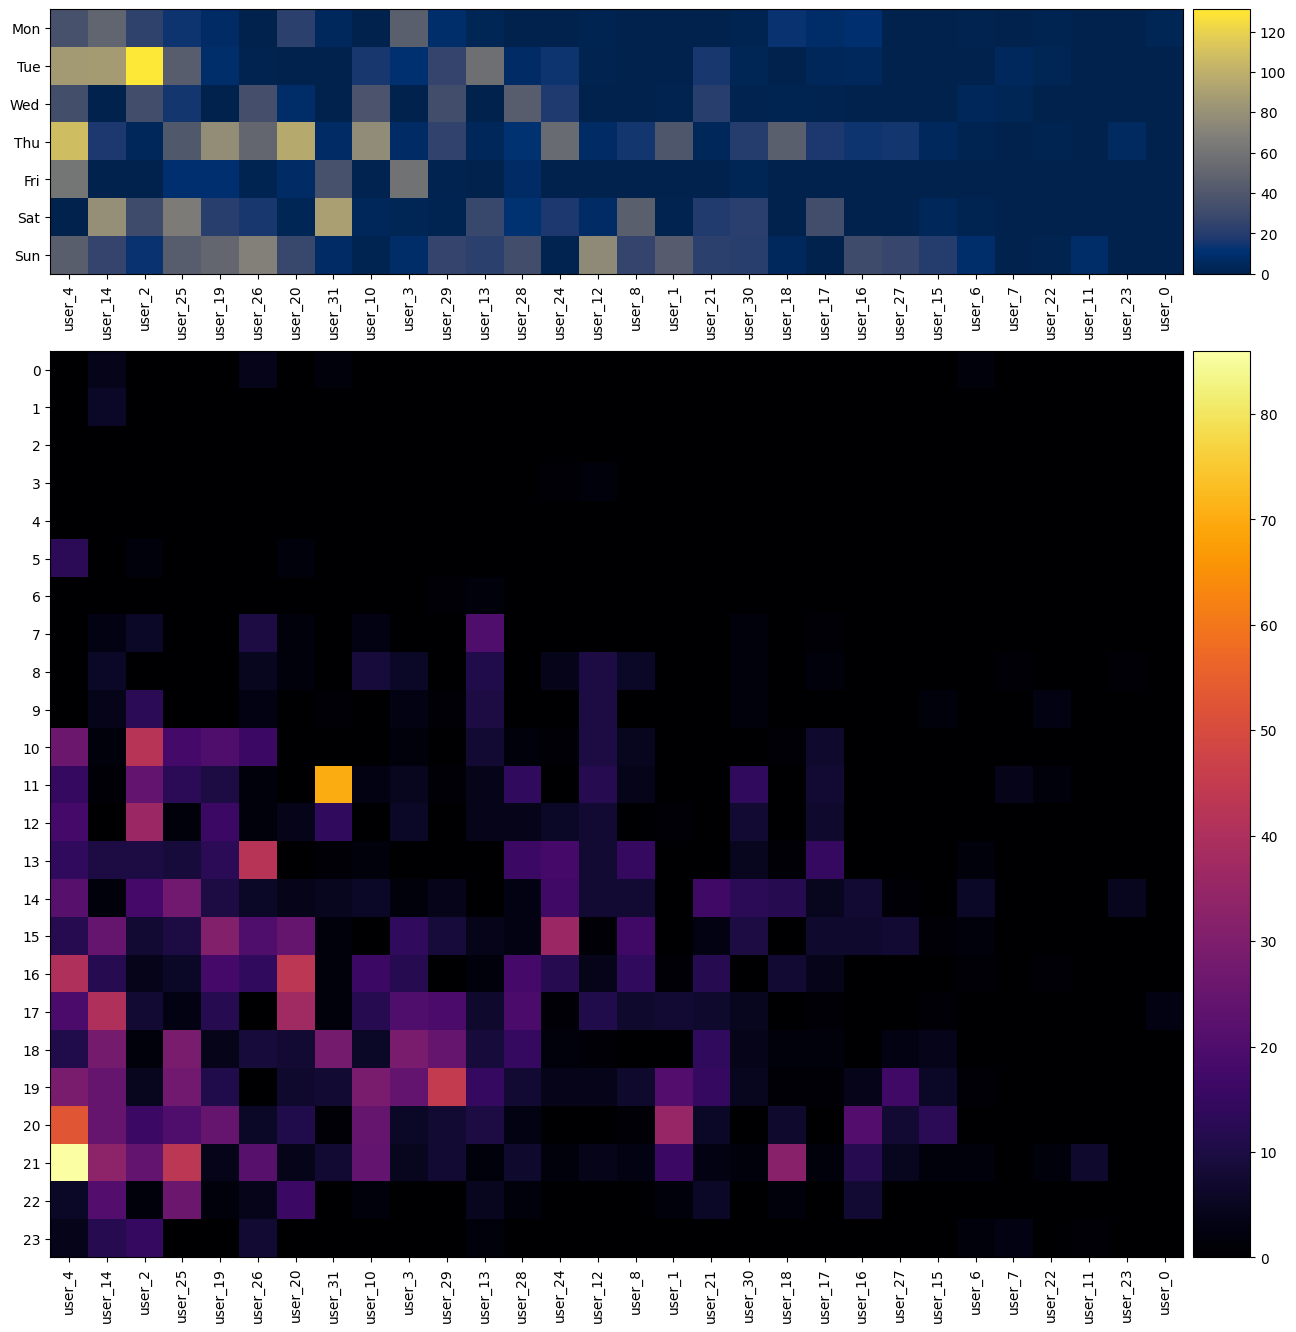

In [5]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_axes([0.1, 0.515, 0.8, 0.25])
im1 = plt.imshow(
    heatmap_data_weekday,
    cmap='cividis',
    #aspect='equal',
)
plt.yticks(range(7)) 
plt.xticks(
    range(len(heatmap_data_weekday.columns)),
    heatmap_data_weekday.columns,
    rotation=90
)
ax1.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0) 

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax1)

ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.55])
im2 = plt.imshow(
    heatmap_data,
    cmap='inferno',
    #aspect='equal',
)
plt.yticks(range(24)) 
plt.xticks(
    range(len(heatmap_data.columns)),
    heatmap_data.columns,
    rotation=90
)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax2)

#### Which user has the most commits on Tue? The answer: user_2.

#### Which user has the most commits on Thu? The answer: user_4.

#### On which weekday do the users not like making a lot of commits? The answer: Fri.

#### Which user at which hour made the largest number of commits? The answer: user_4, 21

#### Peak activity hours - 15:00 - 21:00

In [6]:
con.close()